In [ ]:
# TOP SPOTIFY SONG (2010-2019) : TRENDS , GENRES & AUDIO FEATURES ANALYSIS.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("top10s.csv",encoding='latin1')
df.head(10)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
5,6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
6,7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
7,8,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
8,9,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76
9,10,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73


In [4]:
# Remove spaces, lowercase, remove special characters
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns


Index(['unnamed:_0', 'title', 'artist', 'top_genre', 'year', 'bpm', 'nrgy',
       'dnce', 'db', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [5]:
df.isnull().sum()


unnamed:_0    0
title         0
artist        0
top_genre     0
year          0
bpm           0
nrgy          0
dnce          0
db            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [6]:
print("Before removing duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)


Before removing duplicates: (603, 15)
After removing duplicates: (603, 15)


In [45]:
df.dtypes

unnamed:_0     int64
title         object
artist        object
top_genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
db             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object

In [7]:
# Lowercase genres to avoid duplicates like 'Hip-Hop' vs 'hip-hop'
df['top_genre'] = df['top_genre'].str.lower()
df['artist'] = df['artist'].str.strip()


In [8]:
df.to_csv("cleaned_spotify_data.csv", index=False)


In [9]:
print("Rows & Columns:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData Types:\n", df.dtypes)


Rows & Columns: (603, 15)

Columns:
 Index(['unnamed:_0', 'title', 'artist', 'top_genre', 'year', 'bpm', 'nrgy',
       'dnce', 'db', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

Data Types:
 unnamed:_0     int64
title         object
artist        object
top_genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
db             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object


In [10]:
df.describe()


,unnamed:_0,year,bpm,nrgy,dnce,db,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,174.215384,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [11]:
df['artist'].value_counts().head(10)
df['top_genre'].value_counts().head(10)


top_genre
dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
Name: count, dtype: int64

###  Average Popularity Trend Over the Years

This plot shows how the average popularity of top songs changed over the years. It helps understand whether users’ preferences shifted or remained stable across the decade.

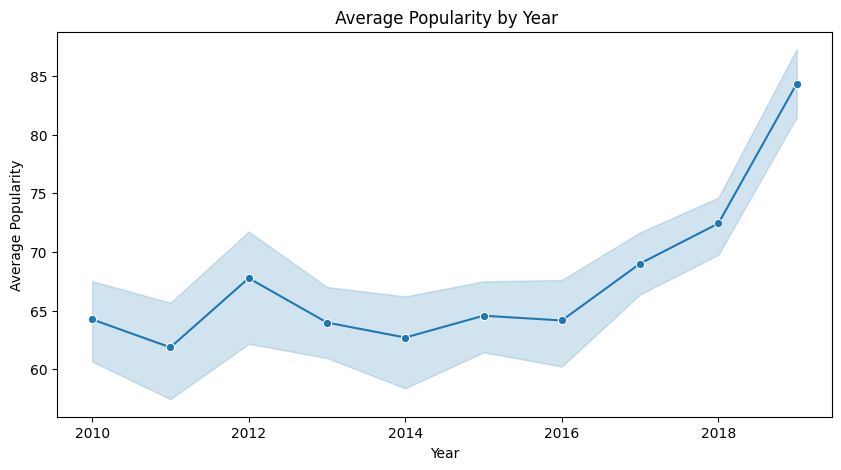

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='year', y='pop', estimator='mean', marker='o')
plt.title(" Average Popularity by Year")
plt.ylabel("Average Popularity")
plt.xlabel("Year")
plt.show()


###  Top 10 Most Common Genres

Here we analyze which genres dominated the top Spotify charts from 2010–2019. Pop and dance-pop are expected to lead, followed by hip-hop and electronic sub-genres.

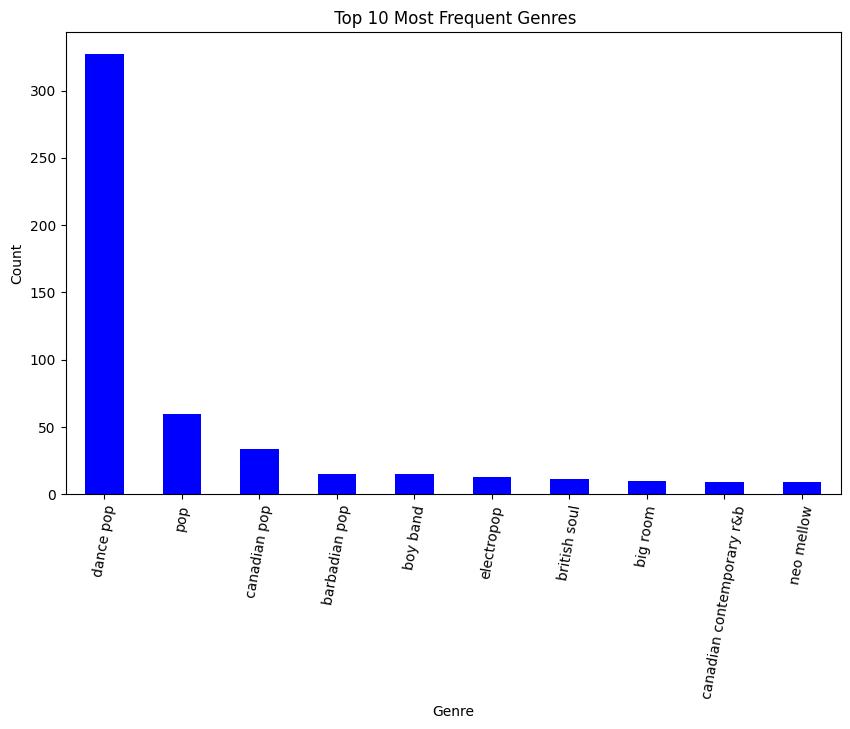

In [13]:
plt.figure(figsize=(10,6))
df['top_genre'].value_counts().head(10).plot(kind='bar', color='blue')
plt.title(" Top 10 Most Frequent Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=80)
plt.show()


###  Correlation Heatmap between Audio Features

This heatmap shows how different audio features relate to one another. For example, energy and loudness might show strong correlation, while acousticness could be negatively related to danceability.

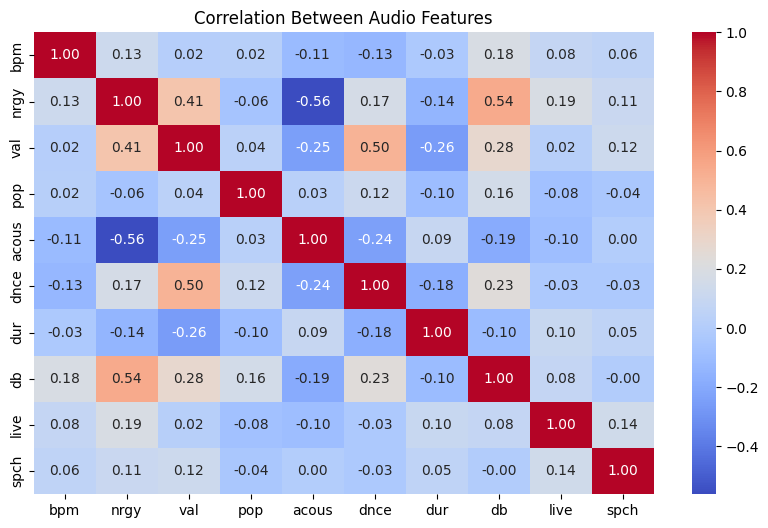

In [14]:
audio_features = ['bpm','nrgy','val','pop','acous','dnce','dur','db','live','spch']
plt.figure(figsize=(10,6))
sns.heatmap(df[audio_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Audio Features")
plt.show()


C:\Users\ayush\AppData\Local\Temp\ipykernel_20276\3405891281.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')


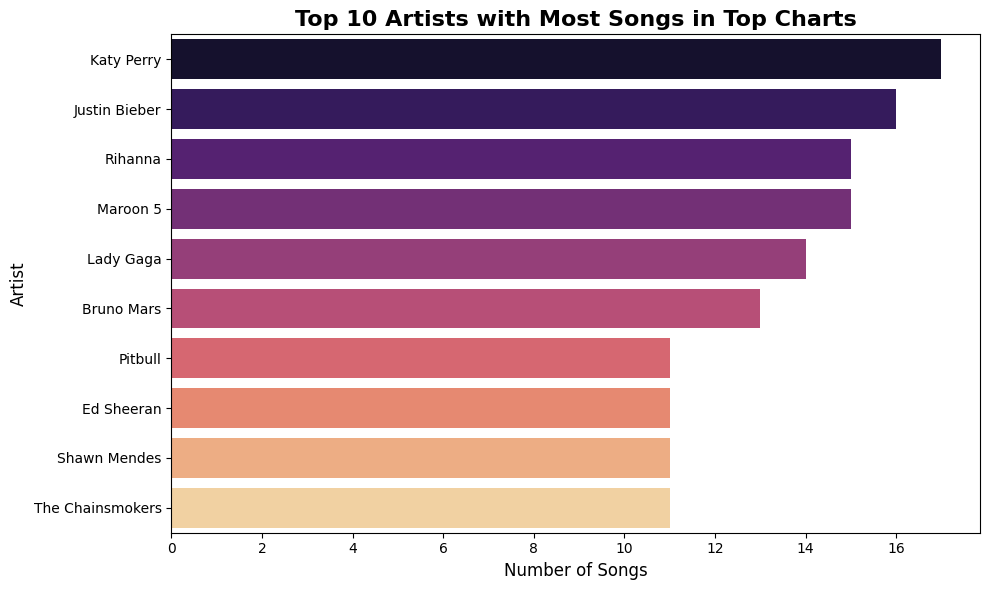

In [23]:
plt.figure(figsize=(10,6))
top_artists = df['artist'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')
plt.title("Top 10 Artists with Most Songs in Top Charts", fontsize=16, fontweight='bold')
plt.xlabel("Number of Songs", fontsize=12)
plt.ylabel("Artist", fontsize=12)
plt.tight_layout()
plt.show()

In [16]:
df.to_csv("cleaned_spotify_data.csv", index=False)


In [29]:
print(df.columns)


Index(['unnamed:_0', 'title', 'artist', 'top_genre', 'year', 'bpm', 'nrgy',
       'dnce', 'db', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')


###  Top 5 Most Danceable Songs

These songs have the highest danceability scores from the dataset, making them the most rhythm-friendly and suitable for party or club environments.


In [30]:
df.sort_values('dnce', ascending=False)[['title', 'artist', 'dnce']].head(5)


,title,artist,dnce
570,Drip (feat. Migos),Cardi B,97
539,Bad Liar,Selena Gomez,97
257,Anaconda,Nicki Minaj,96
389,Me Too,Meghan Trainor,93
418,WTF (Where They From),Missy Elliott,93


## ✅ Final Conclusion

--> Pop and Dance Pop genres were the most frequent in top songs

--> Songs generally had high danceability and energy

--> Average song duration slightly decreased over the years

--> Artists like Katy perry, Justin Bieber , and Rihanna dominated the charts.

--> Audio features like energy and loudness are strongly correlated

This analysis gives a clear view of music trends on Spotify during the 2010s.
